In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_excel("../data/betting_results.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

df

,Match,Date,Market,Odds,Market Odds,EV,Result,Bet Amount (%),Profit/Loss (%),minutes_strength,Bet Amount,Balance
0,Nice vs Rennes,2025-01-03,home,2.148,2.351,0.094507,1.0,0.026049,0.035192,0.744750,351.918645,10351.918645
1,Nice vs Rennes,2025-01-03,under_15,2.712,3.200,0.179941,-1.0,0.030457,-0.030457,0.744750,-304.570595,10047.348050
2,Nice vs Rennes,2025-01-03,under_25,1.580,1.740,0.101266,-1.0,0.050958,-0.050958,0.744750,-509.579199,9537.768850
3,Nice vs Rennes,2025-01-03,under_35,1.212,1.280,0.056106,-1.0,0.059580,-0.059580,0.744750,-568.260268,8969.508582
4,Nice vs Rennes,2025-01-03,home_0,1.500,1.670,0.113333,1.0,0.059580,0.039919,0.744750,358.050225,9327.558808
...,...,...,...,...,...,...,...,...,...,...,...,...
5096,Fortuna Sittard vs Willem II,2025-04-27,home_0,1.242,1.280,0.030596,1.0,0.040310,0.011287,0.737798,112.867649,147339.451601
5097,Fortuna Sittard vs Willem II,2025-04-27,home_p025,1.199,1.230,0.025855,1.0,0.041469,0.009538,0.737798,95.378390,147434.829991
5098,Fortuna Sittard vs Willem II,2025-04-27,home_m025,1.455,1.490,0.024055,1.0,0.018110,0.008874,0.737798,88.738591,147523.568583
5099,Ajax vs Sparta R'dam,2025-04-27,under_15,2.061,4.640,1.251334,-1.0,0.056207,-0.056207,0.702587,-562.069600,146412.771119


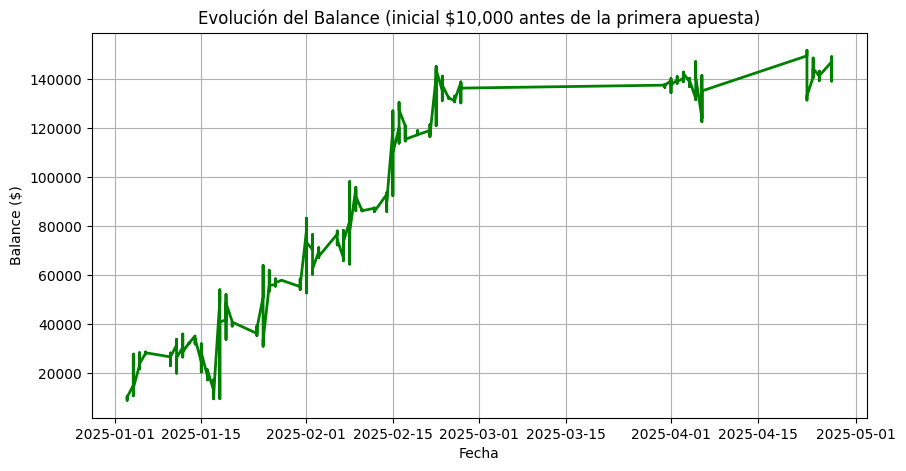

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Balance'], lw=2, color='green')
plt.title("Evolución del Balance (inicial $10,000 antes de la primera apuesta)")
plt.xlabel("Fecha")
plt.ylabel("Balance ($)")
plt.grid(True)
plt.show()


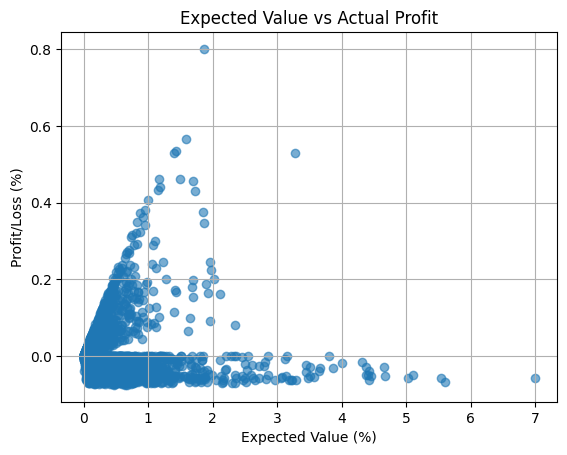

In [12]:
plt.scatter(df['EV'], df['Profit/Loss (%)'], alpha=0.6)
plt.title("Expected Value vs Actual Profit")
plt.xlabel("Expected Value (%)")
plt.ylabel("Profit/Loss (%)")
plt.grid(True)
plt.show()

In [13]:
results_df = pd.DataFrame(df)

# Convert numeric columns to proper types
results_df['Market Odds'] = pd.to_numeric(results_df['Market Odds'], errors='coerce')
results_df['Odds'] = pd.to_numeric(results_df['Odds'], errors='coerce')
results_df['EV'] = pd.to_numeric(results_df['EV'], errors='coerce')
results_df['Result'] = pd.to_numeric(results_df['Result'], errors='coerce')
results_df['Bet Amount (%)'] = pd.to_numeric(results_df['Bet Amount (%)'], errors='coerce')
results_df['Profit/Loss (%)'] = pd.to_numeric(results_df['Profit/Loss (%)'], errors='coerce')

column_order = ['Match', 'Date', 'Market', 'Odds', 'Market Odds', 'EV', 
                'Result', 'Bet Amount (%)', 'Profit/Loss (%)', 'minutes_strength']
results_df = results_df[column_order]

# Calculate statistics by market
print(f"\n--- Statistics by Market Type ---")

# Group by market and calculate statistics
market_stats = results_df.groupby('Market').agg({
    'Market Odds': 'mean',
    'Result': ['count', lambda x: (x > 0).sum(), lambda x: (x < 0).sum()],
    'Profit/Loss (%)': 'sum',
    'Bet Amount (%)': 'mean'
}).round(2)

# Flatten column names
market_stats.columns = ['Avg Market Odds', 'Total Bets', 'Winning Bets', 'Losing Bets', 'Total P/L (%)', 'Avg Bet Amount (%)']

# Calculate win rate and average winning market odds
market_stats['Win Rate (%)'] = (market_stats['Winning Bets'] / market_stats['Total Bets'] * 100).round(2)

# Calculate average winning market odds (only for winning bets)
winning_bets_stats = results_df[results_df['Result'] > 0].groupby('Market')['Market Odds'].mean().round(2)
winning_bets_stats = winning_bets_stats.fillna(0)  # Handle cases with no winning bets
market_stats['Avg Winning Market Odds'] = winning_bets_stats

# Reorder columns for better readability
market_stats = market_stats[['Total Bets', 'Winning Bets', 'Losing Bets', 'Win Rate (%)', 
                            'Total P/L (%)', 'Avg Bet Amount (%)', 'Avg Market Odds', 'Avg Winning Market Odds']]

print(market_stats)

# Overall statistics
total_bets = len(results_df)
winning_bets = len(results_df[results_df['Result'] > 0])
losing_bets = len(results_df[results_df['Result'] < 0])
push_bets = len(results_df[results_df['Result'] == 0])
total_pl = results_df['Profit/Loss (%)'].sum()
win_rate = (winning_bets / total_bets) * 100 if total_bets > 0 else 0
avg_market_odds = results_df['Market Odds'].mean()
avg_bet_amount = results_df['Bet Amount (%)'].mean()

print(f"\n--- Overall Statistics ---")
print(f"Total bets placed: {total_bets}")
print(f"Winning bets: {winning_bets}")
print(f"Push bets: {push_bets}")
print(f"Losing bets: {losing_bets}")
print(f"Win rate: {win_rate:.2f}%")
print(f"Total P/L: {total_pl:.2f}%")
print(f"Average market odds: {avg_market_odds:.2f}")
print(f"Average bet amount: {avg_bet_amount:.2f}%")


--- Statistics by Market Type ---
           Total Bets  Winning Bets  Losing Bets  Win Rate (%)  Total P/L (%)  \
Market                                                                          
away              205            53          152         25.85           0.59   
away_0            189            47           88         24.87           0.48   
away_m025         167            44           49         26.35           2.49   
away_m075         152            42          110         27.63          -0.03   
away_p025         196           104           92         53.06           1.14   
away_p075         201           104           97         51.74           1.47   
draw              236            67          169         28.39           1.84   
home              207            64          143         30.92          -0.19   
home_0            194            63           74         32.47           0.21   
home_m025         175            55           53         31.43           2

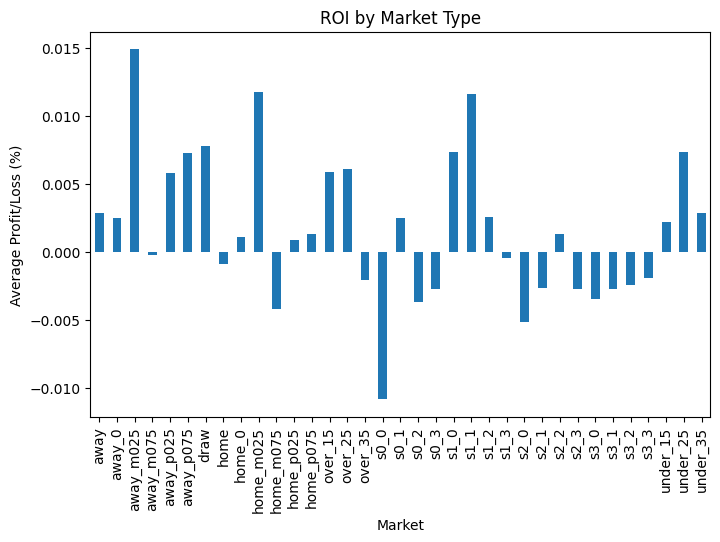

In [15]:
roi_by_market = df.groupby('Market')['Profit/Loss (%)'].mean()
roi_by_market.plot(kind='bar', figsize=(8,5))
plt.title("ROI by Market Type")
plt.ylabel("Average Profit/Loss (%)")
plt.show()
